# Estimating the Distributions of P-Values

> Recall that p-values are defined as the following:
> 
> A p-value is the probability that we observe a test statistic at least as extreme as the one we calculated, assuming the null hypothesis is true.
> 
> It isn't immediately obvious what that definition means, so let's look at some examples to really get an idea of what p-values are, and how they work.
>
> Let's start very simple and say we have 5 data points: x = <1, 2, 3, 4, 5>. Let's also assume the data were generated from some normal distribution with a known variance $\sigma$ but an unknown mean $\mu_0$. What would be a good guess for the true mean?
>
> We know that this data could come from *any* normal distribution, so let's make two wild guesses:
>
> 1. The true mean is 100.
> 2. The true mean is 3.
>
> Intuitively, we know that 3 is the better guess. But how do we actually determine which of these guesses is more likely? By looking at the data and asking "how likely was the data to occur, assuming the guess is true?" 
>
> 1. What is the probability that we observed x=<1,2,3,4,5> assuming the mean is 100? Probabiliy pretty low. And because the p-value is low, we "reject the null hypothesis" that $\mu_0 = 100$.
> 2. What is the probability that we observed x=<1,2,3,4,5> assuming the mean is 3? Seems reasonable. However, something to be careful of is that p-values do not **prove** anything. Just because it is probable for the true mean to be 3, does not mean we know the true mean is 3. If we have a high p-value, we "fail to reject the null hypothesis" that $\mu_0 = 3$.
>
> What do "low" and "high" mean? That is where your significance level $\alpha$ comes back into play. We consider a p-value low if the p-value is less than $\alpha$, and high if it is greater than $\alpha$.

> That was a lot of words, and not a lot of math, so let's actually simulate some data, make some hypotheses, and calculate some p-values.
>
> Start by generating 5 data points from the standard normal distribution using the `rnorm()` function and save the values as `d1`. Keep the `set.seed(1)` in the below cell to make you random samples reproducable.

In [12]:
set.seed(1)
d1 = rnorm(5)
d1

[1] -0.6264538  0.1836433 -0.8356286  1.5952808  0.3295078

> Now forget that those values came from a standard normal. We know they came from a normal with standard deviation $\sigma=1$, but have an unknown mean $\mu_0$.
>
> We want to find a reasonable guess for this true mean, so we make some guesses. Let's say the null hypothesis is $H_0: \mu_0 = 0$ and the alternative hypothesis is $H_1: \mu_0 \ne 0$.
>
> To test our guess, we calculate a test statistic. Because we have know the data comes from a normal distribution with a known standard deviation $\sigma$, we can use a z-score as our test statistic. We will learn more test statistics in future modules. The z-score is defined as follows.

$$ z = \dfrac{\bar{x}-\mu_0}{\sigma/\sqrt{n}} $$

> In the above equation:  
* $\bar{x}$ is the sample mean. We can calculate that with the `mean()` function on our sample: `mean(d1)`.  
* $\mu_0$ is our mean under the null hypothesis. For this example, we're assuming $\mu_0 = 0$.  
* $\sigma$ is known to be $1$.  
* $n$ is the size of the sample. For this example, $n=5$. For a sample of arbitrary size, use the `length()` function.
>
> Use these functions to calculate the z-score for your generated data. Save this value as `z1`.

In [13]:
xbar = mean(d1)
paste0("xbar: ", xbar)
sigma = sd(d1)
paste0("sigma: ", sigma)
d1_len = length(d1)
paste0("d1_len: ", d1_len)
mu = 0
z1 = (xbar - mu)/(sigma/sqrt(d1_len))
paste0("z1: ", z1)

[1] "xbar: 0.129269895004571"

[1] "sigma: 0.961039425048073"

[1] "d1_len: 5"

[1] "z1: 0.300774624995246"

> `z1` is the "critical value" of our sample. If you think of the PDF of a standard normal, a critical value is the x-value that represents how far from the expected value (the mean) our sample was. If the critical value is far away, then the sample was very unlikely, given the null hypothesis. If the critical value is closer to the center, then the sample is more likely to have occured under the null hypothesis.
> 
> It may be helpful to visualize this. A plot is provided for you below of where your `z1` falls on a standard normal curve. 

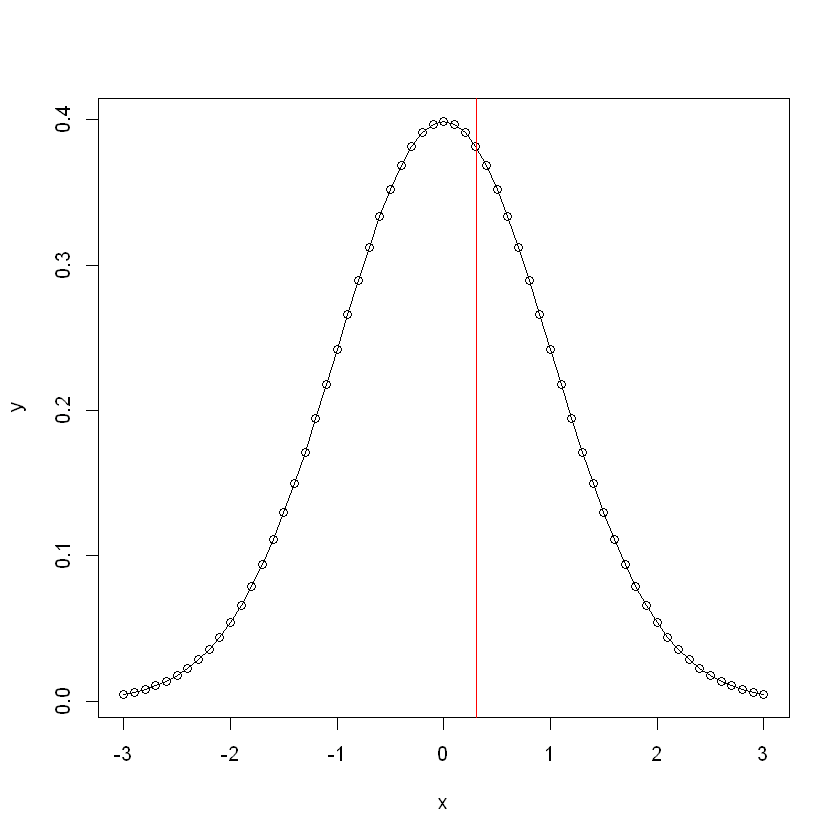

In [14]:
x = seq(-3, 3, 0.1)
y = dnorm(x)
plot(x, y)
lines(x, y)
abline(v=z1, col="red")

> Because this is a PDF, the area under the curve is an actual probability. The p-value is the area "contained" by the critical value. But the area to the right or left of the critical value? It depends on the type of test you are performing:
* If we have a lower-tailed test (i.e. the alternative hypothesis looks like $H_1: \mu_1 < \mu_0$), then you want the area to the left of the critical value. This is because those lower values would be considered "more extreme" than the calculated statistic, because they would be even smaller than what we saw. For a standard normal, this area is represented by $\Phi(z)$ and can be found in R using `pnorm(z1)`.
* If we have an upper-tailed test (i.e. the alternative hypothesis looks like $H_1: \mu_1 > \mu_0$), then we want the area to the right of the critical value, as those values are even larger than our observed statistic. For a standard normal, this area is represented by $1 - \Phi(z)$ and can be found in R using `1-pnorm(z1)`.
* If we have a two-tailed test, then it's a bit tricky because the area could be above *or* below our critical value. If the critical value goes in either direction, then it moves farther from the null hypothesis. To solve this, we have to calculate two areas: the area above the positive test statistic, and area below the negative version of the test statistic. Thankfully, because the normal distribution is symmetric, these areas are equivalent, so we can solve for the total area using $2(1-\Phi(|z|)$ or `2*(1 - pnorm(abs(z1)))` in R.
>
> Our original hyptheses where $H_0: \mu_0=0$ and $H_0: \mu_0 \ne 0$, so we have a two tailed test. Calculate the p-value for our sample using `2*(1 - pnorm(abs(z1)))`.

In [15]:
p_value = 2*(1-pnorm(abs(z1)))
paste("p_value: ", p_value)

[1] "p_value:  0.763586359261209"

> We get a p-value of $0.77$, which is high, so we fail to reject the null hypothesis. That means we continue to assert that $\mu_0 = 0$, because our data did not refute that claim.
>
> But we're not quite done. Generate another sample of 5 random standard normal random variables and name it `d2`. Then repeat this whole process to calculate the p-value for that sample.

In [16]:
d2 = rnorm(5)
d2

[1] -0.8204684  0.4874291  0.7383247  0.5757814 -0.3053884

> The p-value was different for the second sample! That means that the p-value is also a random variable, with it's own distribution. Let's try to see what this distribution is.
>
> To do that, we will need to simulate $m$ samples of $n$ normal variables, calculate the p-value value of each sample, and graph the results. 
>
> Fill in the function below using the steps you did earlier to generate a p-value.

In [17]:
generate.pval = function(n){
    # Generate n samples from a standard normal
    samples = rnorm(n)
    # Calculate the z-score of the sample
    xbar = mean(samples)
    sigma = 1
    mu = 0

    z1 = (xbar - mu)/(sigma/sqrt(n))
    # Calculate the p-value from the z-score
    p_val = 2*(1-pnorm(abs(z1)))
    # Return the p-value
    return(p_val)
}

# set.seed(123)
generate.pval(5)

[1] 0.9320662

> To call the generate function multiple times, we can use the `replicate()` function. We want at least 10000 p-values, so specify `pvals = replicate(10000, generate.pval(5))`.
>
> Now plot a histogram of your p-values using `hist(pvals)`. What do you notice about the shape of this distribution?

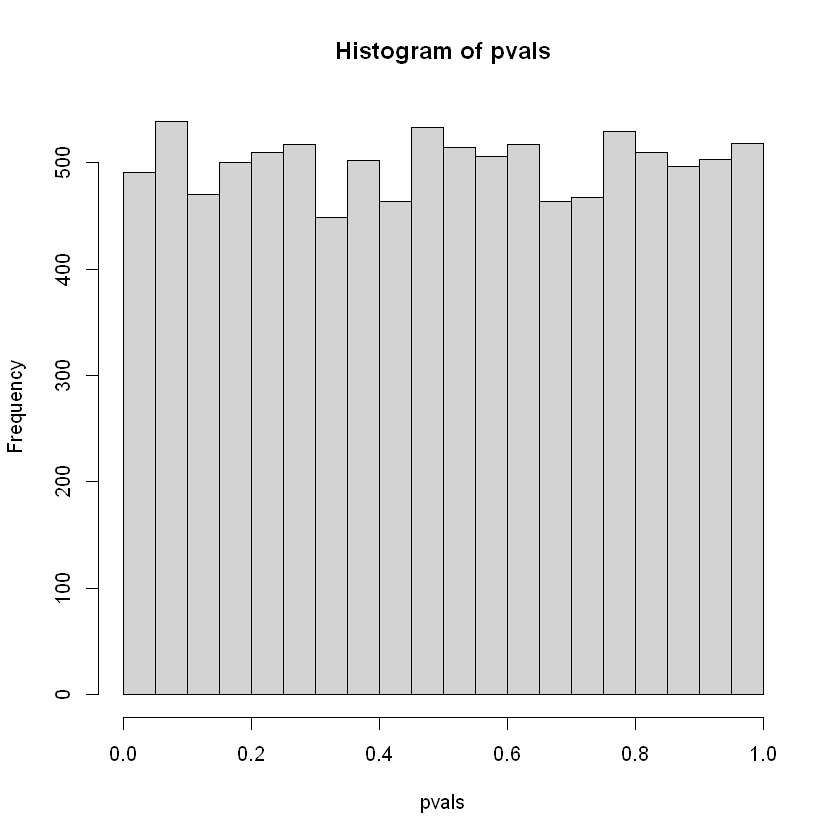

In [20]:
pvals = replicate(10000, generate.pval(5))
hist(pvals)

> Lastly, think about how the significance level $\alpha$ is defined as "the probability of Type I error."  
> 
> Let $\alpha=0.05$, meaning we would reject the null hypothesis if a p-value was less than $0.05$. Now take a look at your histogram at think about how many p-values fall below $0.05$, even though we know that the null hypothesis is correct. We could also find the exact proportion using this code: `sum(pvals < 0.05) / length(pvals)`.
> 
> Now let $\alpha=0.2$. What proportion of p-values fall below $0.2$? 
>
> You should see that p-values are incorrect $\alpha$ percent of the time. 
>
> Similarly, the p-values range everywhere between [0,1], even though the underlying distribution is the same. That means a p-value of $0.9$ is not necesarily stronger evidence than a p-value of $0.1$, it is only a representation of whether we should reject the null hypothesis.

In [19]:
alpha = 0.05
sum(pvals < 0.05) / length(pvals)

[1] 0.0504